# Matin Ghorbani 6.8.Assignment
---

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.activations import sigmoid, linear, relu
from keras.optimizers import Adam, SGD, AdamW, Nadam
from keras.losses import mae
from sklearn.model_selection import train_test_split
from keras.src.callbacks import History

from perceptron_forecast import Perceptron

In [3]:
df = pd.read_csv('../datasets/weatherHistory.csv')
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [4]:
df['Formatted Date'] = df['Formatted Date'].map(lambda x: x.rstrip('021+ '))
df['Formatted Date'] = df['Formatted Date'].str.replace(r'\.', '', regex=True)
df['Formatted Date'] = pd.to_datetime(df['Formatted Date']).dt.date
df['DayOfYear'] = df['Formatted Date'].copy()
df['DayOfYear'].head(10)

0    2006-04-01
1    2006-04-01
2    2006-04-01
3    2006-04-01
4    2006-04-01
5    2006-04-01
6    2006-04-01
7    2006-04-01
8    2006-04-01
9    2006-04-01
Name: DayOfYear, dtype: object

In [5]:
for column in range(len(df['Formatted Date'])):
    this_year = df['Formatted Date'][column].year
    this_mount = df['Formatted Date'][column].month
    this_day = df['Formatted Date'][column].day

    leap_year = 0 if this_year != 2008 and this_year != 2012 and this_year != 2016 else 1

    if this_mount == 1:
        df.loc[column, 'DayOfYear'] = this_day

    elif this_mount == 2:
        df.loc[column, 'DayOfYear'] = this_day + 31

    elif this_mount == 3:
        df.loc[column, 'DayOfYear'] = this_day + 59 + leap_year

    elif this_mount == 4:
        df.loc[column, 'DayOfYear'] = this_day + 90 + leap_year

    elif this_mount == 5:
        df.loc[column, 'DayOfYear'] = this_day + 120 + leap_year

    elif this_mount == 6:
        df.loc[column, 'DayOfYear'] = this_day + 151 + leap_year

    elif this_mount == 7:
        df.loc[column, 'DayOfYear'] = this_day + 181 + leap_year

    elif this_mount == 8:
        df.loc[column, 'DayOfYear'] = this_day + 212 + leap_year

    elif this_mount == 9:
        df.loc[column, 'DayOfYear'] = this_day + 243 + leap_year

    elif this_mount == 10:
        df.loc[column, 'DayOfYear'] = this_day + 273 + leap_year

    elif this_mount == 11:
        df.loc[column, 'DayOfYear'] = this_day + 304 + leap_year

    elif this_mount == 12:
        df.loc[column, 'DayOfYear'] = this_day + 334 + leap_year

print(df['DayOfYear'].head(10), end='\n\n')
print(df['DayOfYear'].tail(10))


0    91
1    91
2    91
3    91
4    91
5    91
6    91
7    91
8    91
9    91
Name: DayOfYear, dtype: object

96443    253
96444    253
96445    253
96446    253
96447    253
96448    253
96449    253
96450    253
96451    253
96452    253
Name: DayOfYear, dtype: object


In [6]:
df.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,DayOfYear
0,2006-04-01,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,91
1,2006-04-01,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,91
2,2006-04-01,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91
3,2006-04-01,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91
4,2006-04-01,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91
5,2006-04-01,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.,91
6,2006-04-01,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.,91
7,2006-04-01,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.,91
8,2006-04-01,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.,91
9,2006-04-01,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.,91


In [7]:
df.drop(['Daily Summary','Summary','Precip Type'], axis=1, inplace=True)

In [8]:
data = df.groupby('Formatted Date')['Temperature (C)'].mean().reset_index()

for column in df.columns:
    if column != 'Formatted Date' and column != 'Temperature (C)':
        mean = df.groupby('Formatted Date')[column].mean().reset_index()
        data = pd.concat([data, mean[column]], axis=1, join='inner')

data

,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),DayOfYear
0,2006-01-01,3.873148,-0.447222,0.818333,21.372750,142.041667,11.112354,0.0,1012.279167,1.0
1,2006-01-02,5.418519,2.042593,0.844583,17.551683,161.958333,8.956967,0.0,1010.131667,2.0
2,2006-01-03,2.319444,0.223843,0.898333,8.417617,248.541667,9.011975,0.0,1020.805000,3.0
3,2006-01-04,2.274074,-0.457407,0.905417,11.579925,46.916667,8.339129,0.0,981.826667,4.0
4,2006-01-05,2.698148,0.256481,0.948333,9.515100,140.375000,4.628750,0.0,935.988333,5.0
...,...,...,...,...,...,...,...,...,...,...
4013,2016-12-27,0.280324,-3.158102,0.890000,10.980200,185.875000,7.303362,0.0,1020.304583,362.0
4014,2016-12-28,0.224306,-3.223611,0.890000,10.969467,186.166667,7.304704,0.0,1020.334583,363.0
4015,2016-12-29,0.169676,-3.268056,0.889583,10.892992,186.041667,7.309400,0.0,1020.365833,364.0
4016,2016-12-30,0.119444,-3.306019,0.889167,10.806454,186.041667,7.316779,0.0,1020.395000,365.0


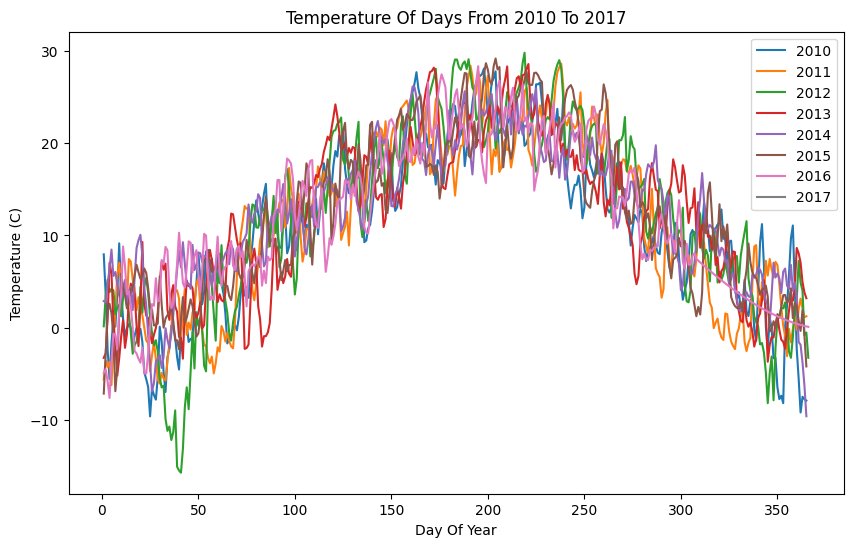

In [9]:
plt.figure(figsize=(10, 6))

data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])

for day in range(2010, 2018):
    focused_day = data.loc[data['Formatted Date'].dt.year == day]
    plt.plot(focused_day['DayOfYear'], focused_day['Temperature (C)'], label=str(day))

plt.xlabel('Day Of Year')
# plt.xlim([-10, 380])
plt.ylabel('Temperature (C)')
plt.title('Temperature Of Days From 2010 To 2017')
plt.legend()
plt.show()

## MLP

In [59]:
data.corr()

/tmp/ipykernel_19277/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),DayOfYear
Temperature (C),1.000000,0.995747,-0.590622,-0.139730,0.051811,0.575520,NaN,-0.000665,0.158705
Apparent Temperature (C),0.995747,1.000000,-0.573652,-0.190833,0.050287,0.554627,NaN,0.006784,0.167355
Humidity,-0.590622,-0.573652,1.000000,-0.059326,-0.017147,-0.693664,NaN,-0.006716,0.084541
Wind Speed (km/h),-0.139730,-0.190833,-0.059326,1.000000,0.159346,0.196635,NaN,-0.085750,-0.136642
Wind Bearing (degrees),0.051811,0.050287,-0.017147,0.159346,1.000000,0.099641,NaN,-0.043628,-0.031238
Visibility (km),0.575520,0.554627,-0.693664,0.196635,0.099641,1.000000,NaN,0.056049,-0.097194
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.000665,0.006784,-0.006716,-0.085750,-0.043628,0.056049,NaN,1.000000,-0.033029
DayOfYear,0.158705,0.167355,0.084541,-0.136642,-0.031238,-0.097194,NaN,-0.033029,1.000000


In [60]:
X = data[['DayOfYear', 'Visibility (km)']].astype('int')
Y = data[['Temperature (C)']].astype('int')

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3214, 2), (804, 2), (3214, 1), (804, 1))

In [75]:
model = Sequential([
    Dense(2, activation=sigmoid),
    Dense(64, activation=relu),
    Dense(32, activation=relu),
    Dense(1, activation=linear)
])

In [78]:
model.compile(optimizer=Nadam(), loss=mae)

In [79]:
output: History = model.fit(x_train, y_train, epochs=100)

Epoch 1/100
101/101 [==============================] - 1s 3ms/step - loss: 10.3987
Epoch 2/100
101/101 [==============================] - 0s 2ms/step - loss: 7.4339
Epoch 3/100
101/101 [==============================] - 0s 2ms/step - loss: 6.9129
Epoch 4/100
101/101 [==============================] - 0s 2ms/step - loss: 6.3654
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 6.1049
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 6.0973
Epoch 7/100
101/101 [==============================] - 0s 3ms/step - loss: 6.0997
Epoch 8/100
101/101 [==============================] - 0s 2ms/step - loss: 6.0959
Epoch 9/100
101/101 [==============================] - 0s 3ms/step - loss: 6.0897
Epoch 10/100
101/101 [==============================] - 0s 2ms/step - loss: 6.0829
Epoch 11/100
101/101 [==============================] - 0s 2ms/step - loss: 6.0745
Epoch 12/100
101/101 [==============================] - 0s 2ms/step - loss: 6.0791
Epoch 13/100

In [80]:
loss = model.evaluate(x_test, y_test)
loss

26/26 [==============================] - 0s 880us/step - loss: 3.2734


3.273404598236084

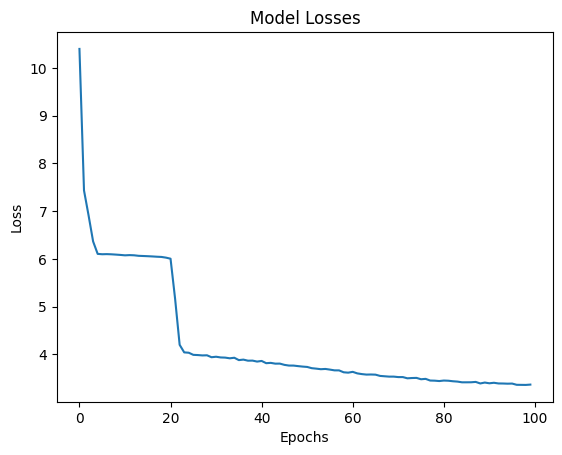

In [81]:
plt.plot(output.history['loss'])
plt.title('Model Losses')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [12]:
focused_year = data.loc[data['Formatted Date'].dt.year == 2010]

In [82]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])

Y_pred = []
for day, visibility in zip(focused_year['DayOfYear'], focused_year['Visibility (km)']):
    Y_pred.append(model.predict([[day, visibility]]))

1/1 [==============================] - 0s 19ms/step


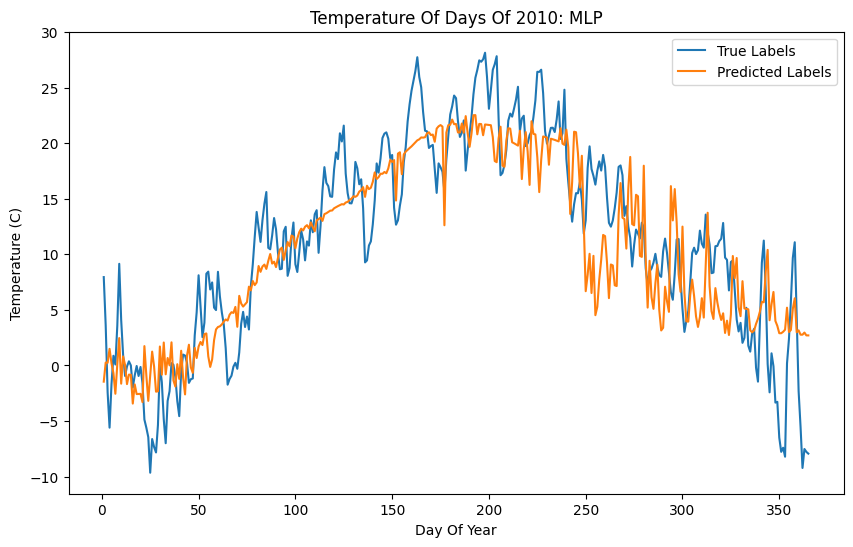

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(focused_year['DayOfYear'], focused_year['Temperature (C)'], label='True Labels')

Y_pred = np.array(Y_pred).reshape(365, 1)

plt.plot(focused_year['DayOfYear'], Y_pred[:, 0], label='Predicted Labels')

plt.title('Temperature Of Days Of 2010: MLP')
plt.ylabel('Temperature (C)')
plt.xlabel('Day Of Year')
plt.legend()
plt.show()

In [95]:
model.save('weather_predictions.h5')

/home/matin/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
X = data['DayOfYear'].copy().values
Y = data['Temperature (C)'].copy().values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


perceptron = Perceptron(0.00001, 0.0001, 100)
weights, bias, w, b, losses = perceptron.fit(x_train=X_train, y_train=Y_train)

100%|██████████| 100/100 [00:02<00:00, 38.38it/s]


In [26]:
Y_pred_perceptron = []
for i in focused_year['DayOfYear']:
    i = int(i)
    Y_pred_perceptron.append(perceptron.predict(i))

In [27]:
Y_pred_perceptron

[9.344727052898568,
 9.358727675962184,
 9.3727282990258,
 9.386728922089416,
 9.400729545153034,
 9.41473016821665,
 9.428730791280266,
 9.442731414343882,
 9.456732037407498,
 9.470732660471114,
 9.48473328353473,
 9.498733906598346,
 9.512734529661964,
 9.52673515272558,
 9.540735775789196,
 9.554736398852812,
 9.568737021916428,
 9.582737644980044,
 9.59673826804366,
 9.610738891107276,
 9.624739514170894,
 9.63874013723451,
 9.652740760298126,
 9.666741383361742,
 9.680742006425358,
 9.694742629488974,
 9.70874325255259,
 9.722743875616207,
 9.736744498679823,
 9.75074512174344,
 9.764745744807056,
 9.778746367870673,
 9.792746990934289,
 9.806747613997905,
 9.82074823706152,
 9.834748860125137,
 9.848749483188755,
 9.86275010625237,
 9.876750729315987,
 9.890751352379603,
 9.904751975443219,
 9.918752598506835,
 9.93275322157045,
 9.946753844634067,
 9.960754467697683,
 9.9747550907613,
 9.988755713824917,
 10.002756336888533,
 10.016756959952149,
 10.030757583015765,
 10.0447582

In [18]:
model: Sequential = load_model('./weather_predictions.h5')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2)                 6         
                                                                 
 dense_21 (Dense)            (None, 64)                192       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2311 (9.03 KB)
Trainable params: 2311 (9.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])

Y_pred = []
for day, visibility in zip(focused_year['DayOfYear'], focused_year['Visibility (km)']):
    Y_pred.append(model.predict([[day, visibility]]))

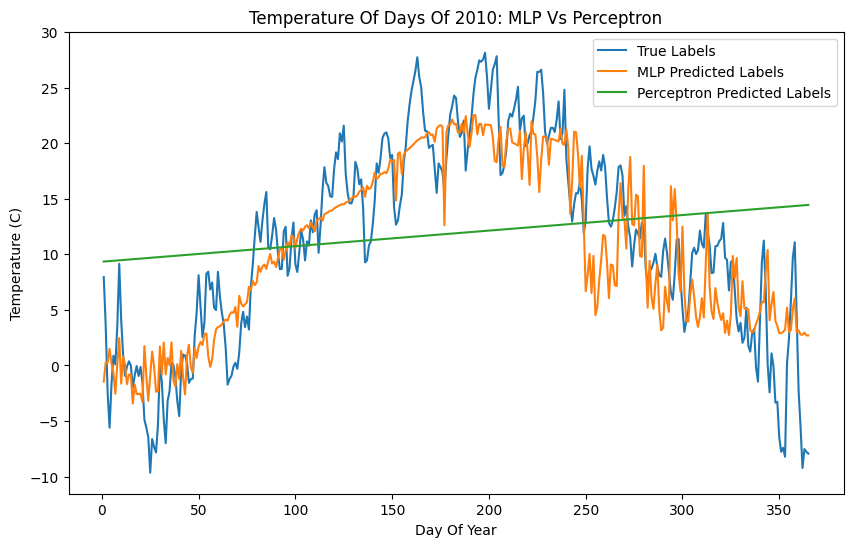

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(focused_year['DayOfYear'], focused_year['Temperature (C)'],
         label='True Labels')

Y_pred = np.array(Y_pred)
Y_pred = Y_pred.reshape(365, 1)

plt.plot(focused_year['DayOfYear'], Y_pred[:, 0],
         label=f'MLP Predicted Labels')

plt.plot(focused_year['DayOfYear'], Y_pred_perceptron,
         label=f'Perceptron Predicted Labels')

plt.title('Temperature Of Days Of 2010: MLP Vs Perceptron')
plt.ylabel('Temperature (C)')
plt.xlabel('Day Of Year')
plt.legend()
plt.show()